In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
disaster_csv = 'data\disaster_final.csv'
sp_csv = 'data\s&pfinal.csv'

disaster_df = pd.read_csv(disaster_csv)
sp_df = pd.read_csv(sp_csv)

In [3]:
#check data
disaster_df.head()

,Year,Natural,Technological
0,1987,11,10
1,1988,22,4
2,1989,19,16
3,1990,24,8
4,1991,36,10


In [4]:
#check data
sp_df

,Year,SP500,Consumer Price Index
0,1987,286.84,113.62
1,1988,265.78,118.26
2,1989,322.83,123.97
3,1990,334.59,130.66
4,1991,376.18,136.19
5,1992,415.74,140.32
6,1993,451.41,144.46
7,1994,460.33,148.23
8,1995,541.64,152.38
9,1996,670.83,156.85


In [5]:
#merge the two dataframes into one
new_merged = pd.merge(disaster_df, sp_df, on="Year")
new_merged

,Year,Natural,Technological,SP500,Consumer Price Index
0,1987,11,10,286.84,113.62
1,1988,22,4,265.78,118.26
2,1989,19,16,322.83,123.97
3,1990,24,8,334.59,130.66
4,1991,36,10,376.18,136.19
5,1992,32,3,415.74,140.32
6,1993,30,7,451.41,144.46
7,1994,16,13,460.33,148.23
8,1995,18,7,541.64,152.38
9,1996,15,10,670.83,156.85


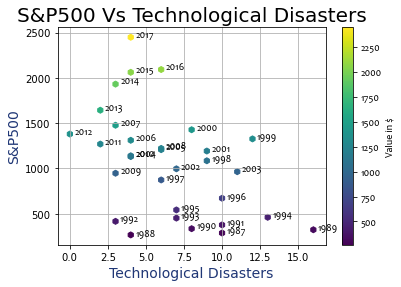

In [6]:
#check for linearity technical disasters

fig, ax = plt.subplots()
plt.scatter(new_merged['Technological'],new_merged['SP500'],c=new_merged['SP500'],marker="h")
plt.title('S&P500 Vs Technological Disasters',fontsize=20)
plt.xlabel('Technological Disasters',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
clb = plt.colorbar()
clb.set_label("Value in $")
for i, txt in enumerate(new_merged['Year']):
    ax.annotate(txt, (new_merged['Technological'][i]+.3,new_merged['SP500'][i]))
plt.show()

fig.savefig('SP500_Technological.png',dpi=300)

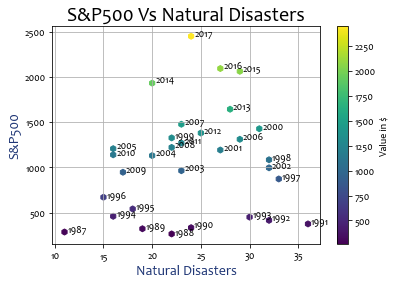

In [7]:
#check for linearity natural disasters

fig, ax = plt.subplots()
plt.scatter(new_merged['Natural'],new_merged['SP500'],c=new_merged['SP500'],marker="h")
plt.title('S&P500 Vs Natural Disasters',fontsize=20)
plt.xlabel('Natural Disasters',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
clb = plt.colorbar()
clb.set_label("Value in $")
for i, txt in enumerate(new_merged['Year']):
    ax.annotate(txt, (new_merged['Natural'][i]+.3,new_merged['SP500'][i]))
plt.show()

fig.savefig('SP500_Natural.png',dpi=300)

In [15]:
X = new_merged['Consumer Price Index'].values.reshape(-1, 1)
y = new_merged['SP500'].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (31, 1) (31, 1)


array([[113.62],
       [118.26],
       [123.97],
       [130.66],
       [136.19],
       [140.32],
       [144.46],
       [148.23],
       [152.38],
       [156.85],
       [160.52],
       [163.01],
       [166.58],
       [172.2 ],
       [177.07],
       [179.88],
       [183.96],
       [188.88],
       [195.29],
       [201.59],
       [207.34],
       [215.3 ],
       [214.54],
       [218.06],
       [224.94],
       [229.59],
       [232.96],
       [236.74],
       [237.02],
       [240.01],
       [245.12]])

In [16]:

model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[12.98852592]]
y-axis intercept:  [-1297.25057769]


In [19]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[113.62]]
Max X Value: [[245.12]]


In [20]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [23]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 62648.556309653475
R-squared (R2 ): 0.8085415982330598


In [24]:
text1 = "Mean Squared Error :62648.556"
text2 = "R-squared : 0.8085"
text3 = "y-axis intercept: -1297.250"
text4 = "Weight coefficients: 12.9885"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

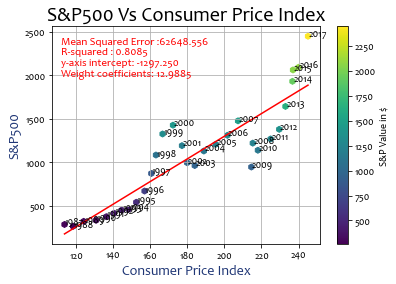

In [25]:
#check for linearity consumer price index

fig, ax = plt.subplots()
plt.scatter(new_merged['Consumer Price Index'],new_merged['SP500'],c=new_merged['SP500'],marker="h")
plt.title('S&P500 Vs Consumer Price Index',fontsize=20)
plt.xlabel('Consumer Price Index',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(112,2000),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
for i, txt in enumerate(new_merged['Year']):
    ax.annotate(txt, (new_merged['Consumer Price Index'][i]+.3,new_merged['SP500'][i]))

plt.show()

fig.savefig('SP500_CPI.png',dpi=300)

In [9]:
#sklearn output for intercept and coefficients for each x dependent variable

X = new_merged[['Natural','Technological','Consumer Price Index']] # 3 variables for multiple regression
y = new_merged['SP500']
 
# with sklearn fit the model with all of x dependent variables or features
regr = linear_model.LinearRegression()
regr.fit(X, y)

model = LinearRegression()
model.fit(X,y)
score = model.score(X,y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print('R2 Score: ', score)

Intercept:  -2172.190817635241
Coefficients:  [13.70887502 32.69370455 14.82384626]
R2 Score:  0.8480519201928153


In [10]:
#Create a prediction with sklearn

july2020cpi = 259.101
tech20disasters = 6
natural20disasters = 25

print ('Predicted S&P500: ', regr.predict([[natural20disasters ,tech20disasters, july2020cpi]]))

Predicted S&P500:  [2207.56667452]


In [11]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     50.23
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           3.54e-11
Time:                        20:29:18   Log-Likelihood:                -211.61
No. Observations:                  31   AIC:                             431.2
Df Residuals:                      27   BIC:                             436.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2172.1908 

Final formula is:

$SP500$ = $-2172.19$ + $13.70*Natural$ + $32.69*Technological$ + $14.82*ConsumerPriceIndex$

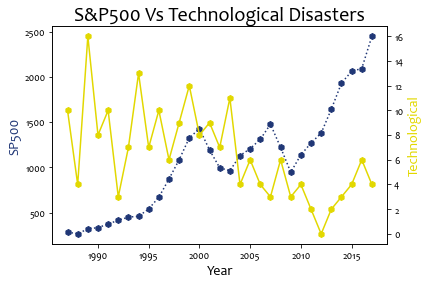

In [12]:
#Create a linechart to visualize overtime changes between Tech Disasters vs SP500
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(new_merged['Year'], new_merged['SP500'], color="#203776", marker="h",linestyle='dotted')
ax.set_xlabel("Year",fontsize=14)

ax.set_ylabel("SP500",color="#203776",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(new_merged['Year'], new_merged['Technological'],color="#E2D800",marker="h")
ax2.set_ylabel("Technological",color="#E2D800",fontsize=14)
plt.title('S&P500 Vs Technological Disasters',fontsize=20)
plt.rcParams["font.family"] = "candara"
plt.show()

# save file
fig.savefig('linechart_tech.png',dpi=300)

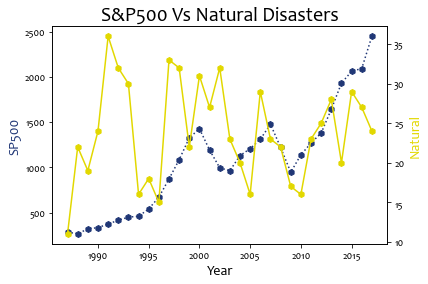

In [13]:
#Create a linechart to visualize overtime changes between Natural Disasters vs SP500
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(new_merged['Year'], new_merged['SP500'], color="#203776", marker="h",linestyle='dotted')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("SP500",color="#203776",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(new_merged['Year'], new_merged['Natural'],color="#E2D800",marker="h")
ax2.set_ylabel("Natural",color="#E2D800",fontsize=14)
plt.title('S&P500 Vs Natural Disasters',fontsize=20)
plt.rcParams["font.family"] = "candara"
plt.show()

# save file
fig.savefig('linechart_natural.png',dpi=300)

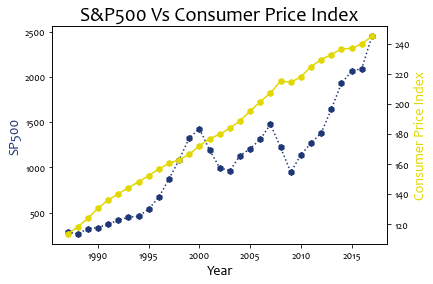

In [14]:
#Create a linechart to visualize overtime changes between CPI vs SP500
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(new_merged['Year'], new_merged['SP500'], color="#203776", marker="h",linestyle='dotted')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("SP500",color="#203776",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(new_merged['Year'], new_merged['Consumer Price Index'],color="#E2D800",marker="h")
ax2.set_ylabel("Consumer Price Index",color="#E2D800",fontsize=14)
plt.title('S&P500 Vs Consumer Price Index',fontsize=20)
plt.rcParams["font.family"] = "candara"
plt.show()

# save file
fig.savefig('linechart_CPI.png',dpi=300)